In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.constants import h 
from scipy.optimize import curve_fit
from scipy import optimize
import matplotlib.ticker as ticker
from plot_yar import plot_approx


In [2]:
data = pd.read_excel('data.xlsx')
data

,"\nu_рез, МГц","\sigma_\nu, МГц",Unnamed: 2,"V_R, мВ","V_пр, мВ","V_пр1, мВ","V_пр2, мВ",\sigma_V_пр
0,128.5,0.4,NaN,24.65,4.560,4.41,4.71,0.150
1,"V_R, мВ","\sigma_V_R, мВ",NaN,30.85,5.625,5.47,5.78,0.155
2,61.9,1.4,NaN,37.18,6.780,6.59,6.97,0.190
3,NaN,NaN,NaN,43.35,7.840,7.63,8.05,0.210
4,"2L, дел","\sigma_2L, дел",NaN,49.61,9.005,8.74,9.27,0.265
5,7.5,0.1,NaN,55.50,10.065,9.82,10.31,0.245
6,\deltaL,\sigma_deltaL,NaN,61.60,11.195,10.92,11.47,0.275
7,1.5,0.3,NaN,68.10,12.205,11.93,12.48,0.275
8,NaN,NaN,NaN,74.28,13.480,13.17,13.79,0.310
9,"V_пр1, мВ","V_пр2, мВ",NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
VR = data['V_R, мВ'].dropna()
Vpr = data['V_пр, мВ'].dropna()
pd.DataFrame((VR,Vpr))

,0,1,2,3,4,5,6,7,8
"V_R, мВ",24.65,30.850,37.18,43.35,49.610,55.500,61.600,68.100,74.28
"V_пр, мВ",4.56,5.625,6.78,7.84,9.005,10.065,11.195,12.205,13.48


In [39]:
err = list(data['\sigma_V_пр'].dropna())
err

[0.1499999999999999,
 0.15500000000000025,
 0.18999999999999995,
 0.2100000000000004,
 0.2649999999999997,
 0.2450000000000001,
 0.27500000000000036,
 0.27500000000000036,
 0.3099999999999996]

sigma_a =  0.02086339894941348
sigma_b =  1.0843618186329091


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


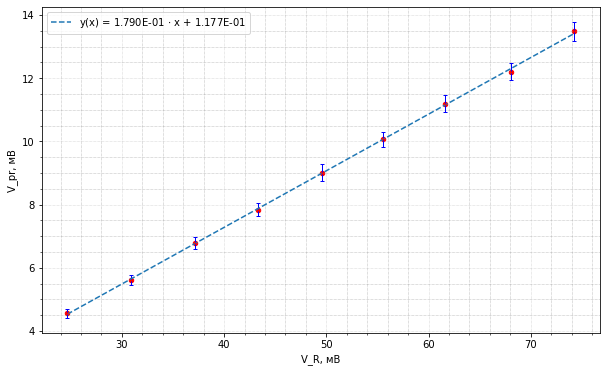

In [43]:
linear = lambda x, a, b: a*x + b
X, Y = VR, Vpr
opt, cov = curve_fit(linear, X, Y, absolute_sigma=err)
S_e = np.sqrt(np.sum((Y - linear(X, *opt))**2) / len(X))
sigma_a = np.sqrt(cov[0][0])
sigma_b = np.sqrt(cov[1][1])
print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)

fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(VR, Vpr, color = 'red', s = 20)
ax.plot(X, linear(X, *opt), '--', label=r'y(x) = {:.3E} $\cdot$ x + {:.3E}'.format(opt[0], opt[1]))
lgnd = ax.legend()

#ax.set_title(r'Число отсчетов от тока в катушке')
ax.set_ylabel(r'V_pr, мВ')
ax.set_xlabel(r'V_R, мВ')

ax.minorticks_on()

ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major',linestyle = ':', linewidth = 0.5)

plt.errorbar(VR, Vpr, yerr=err, fmt = 'ro', markersize = '1', capsize = 2, elinewidth = 1, capthick = 1, ecolor = 'blue')

plt.savefig('V.png', dpi=400, quality=100)
plt.show()

In [49]:
np.sqrt((4/np.pi**2/100/14.6**2*10**6/46)**2*(0.1/10**3)**2+(8*11.1/10**3/np.pi**2/100/14.6**3*10**9/46)**2*(0.1/10**3)**2)*10**3

0.07522222883605838

In [63]:
g = h*128.5*10**6/927*10**26/4.59*10**3
g
sg = np.sqrt((h/927*10**26/4.59*10**3)**2*(0.4*10**6)**2+(2*g/4.5*10**3)**2*(0.1/10**3)**2)
sg

0.08915522752519402

In [80]:
Bm = np.sqrt(2)*1.13/10**3/np.pi**2/100/46/14.6**2*10**6
sBm = np.sqrt((Bm/1.13*10**3)**2*(0.02/10**3)**2+(2*Bm/14.6*10**3)**2*(0.1/10**3)**2)
Bm*10**3

db = np.sqrt((0.066/10**3/1.5)**2*(0.3)**2+(0.066/10**3/7.5*2)**2*(0.1)**2+(0.066/10**3/0.165)**2*(0.004)**2)
db*10**3

0.013412591099411033

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


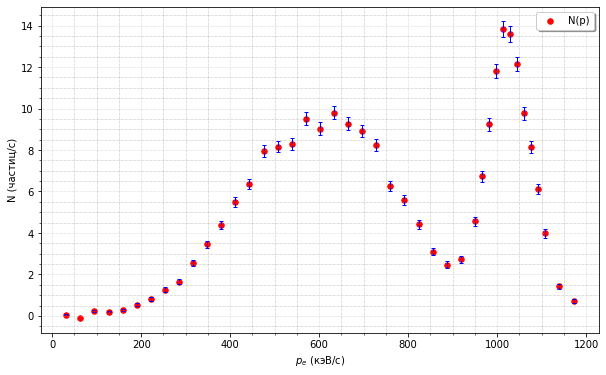

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(p_e, N_Nf, color = 'red', s = 30)
lgnd = ax.legend([r'N(p)'], loc='upper right', shadow=True)

#ax.set_title(r'Число отсчетов от тока в катушке')
ax.set_ylabel(r'N (частиц/с)')
ax.set_xlabel(r'$p_e$ (кэВ/c)')

ax.minorticks_on()

ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major',linestyle = ':', linewidth = 0.5)

plt.errorbar(p_e, N_Nf, yerr=err, fmt = 'ro', markersize = '1', capsize = 2, elinewidth = 1, capthick = 1, ecolor = 'blue')

plt.savefig('N(p).png', dpi=400, quality=100)
plt.show()

In [9]:
T_e = np.sqrt(p_e**2 + 510**2) - 510

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


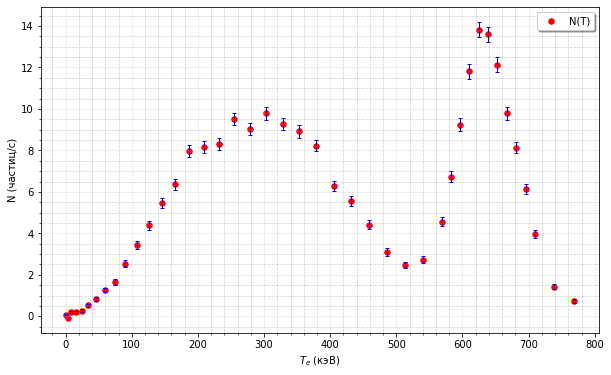

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(T_e, N_Nf, color = 'red', s = 30)
lgnd = ax.legend([r'N(T)'], loc='upper right', shadow=True)

#ax.set_title(r'Число отсчетов от тока в катушке')
ax.set_ylabel(r'N (частиц/с)')
ax.set_xlabel(r'$T_e$ (кэВ)')

ax.minorticks_on()

ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major',linestyle = ':', linewidth = 0.5)

plt.errorbar(T_e, N_Nf, yerr=err, fmt = 'ro', markersize = '1', capsize = 2, elinewidth = 1, capthick = 1, ecolor = 'blue')

plt.savefig('N(T).png', dpi=400, quality=100)
plt.show()

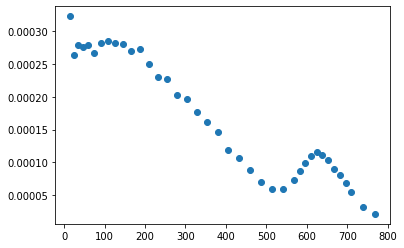

In [11]:
Y = np.sqrt(N_Nf) / (p_e)**(3/2)

plt.scatter(T_e[3:], Y[3:])

a =  -6.307683519862769e-07
b =  0.00038110071163372644
sigma_a =  1.222463010754079e-08
sigma_b =  4.159301669258164e-06
S_e =  5.198623458217959e-06
Relative S_r a = %  1.9380538146921407
Relative S_r b = %  1.091391735121094


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


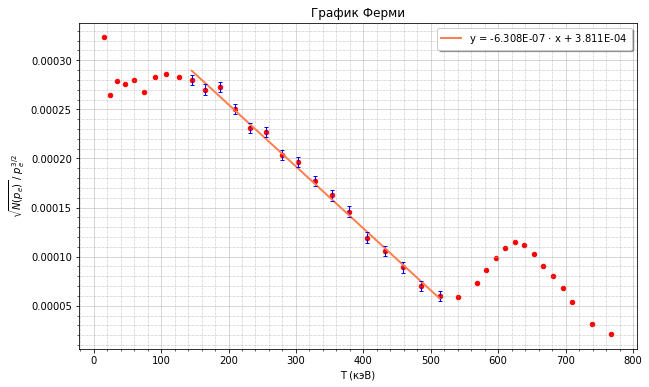

In [12]:
T_e_fit = T_e[12:28]
Y_fit = Y[12:28]

def approx(x, a, b):
    return a * x + b
beta_opt1, beta_cov1 = curve_fit(approx, T_e_fit, Y_fit)
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = Y_fit - approx(T_e_fit, a, b)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(T_e_fit))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(T_e_fit, approx(T_e_fit, *beta_opt1), 'coral', lw = 2)
ax.scatter(T_e[3:], Y[3:], color = 'red', s = 20)
lgnd = ax.legend([r'y = {:.3E} $\cdot$ x + {:.3E} '.format(a,b)], loc='upper right', shadow=True)

ax.set_title(r'График Ферми')
ax.set_ylabel(r'$\sqrt{N(p_e)}\;/\;p_e^{3/2}$')
ax.set_xlabel(r'T (кэВ)')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(T_e_fit, Y_fit, fmt = 'ro', markersize = '1', yerr = S_e, capsize = 2, elinewidth = 1, capthick = 1, ecolor = 'blue')


plt.savefig('mkFermi.png', dpi=400, quality=100)
plt.show()

In [13]:
E_max = -b/a
E_max

604.1848967749379

In [40]:
E_error = np.sqrt((100* sigma_a/abs(a))**2 + (100* sigma_b/abs(b))**2)
print('%', E_error)
print(E_error/100 * E_max)

% 2.2242276205760483
13.438447353417056


In [39]:
data_1 = data.drop(['Unnamed: 4', '№.1'	,'I, A.1'	,'Nф, 1/c',	'dN'	,'t,c',	'Unnamed: 10',	'№.2',	'I, A.2', 't, c'], axis=1)[['I, A', 'N, 1/c', 'Nф(I)', 'N-Nф, 1/c']]
data_1[r'p_e, кэВ/c'] = p_e
data_1[r'T_e, кэВ'] = T_e
data_1.insert(0, '№', range(1,len(p_e)+1))
with open('table_1.tex', 'w') as f:
    f.write(data_1.to_latex(index=False,position='H', label='t1', caption='Данные', float_format="%.3f"))

data_1

,№,"I, A","N, 1/c",Nф(I),"N-Nф, 1/c","p_e, кэВ/c","T_e, кэВ"
0,1,0.10,1.410,1.344390,0.065610,31.671875,0.982493
1,2,0.20,1.230,1.328780,-0.098780,63.343750,3.918700
2,3,0.30,1.540,1.313171,0.226829,95.015625,8.775451
3,4,0.40,1.510,1.297561,0.212439,126.687500,15.499498
4,5,0.50,1.560,1.281951,0.278049,158.359375,24.020310
5,6,0.60,1.799,1.266341,0.532659,190.031250,34.253503
6,7,0.70,2.079,1.250732,0.828268,221.703125,46.104555
7,8,0.80,2.509,1.235122,1.273878,253.375000,59.472467
8,9,0.90,2.879,1.219512,1.659488,285.046875,74.253131
9,10,1.00,3.749,1.203902,2.545098,316.718750,90.342208
